In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
X.shape
y.shape

(1797,)

In [5]:
X[7].reshape(8,8)

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

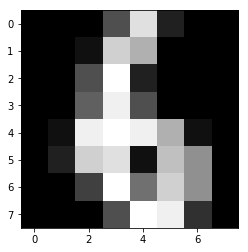

In [6]:
plt.imshow(X[34].reshape(8,8),cmap='gray')

In [7]:
X= X.reshape(-1,64)
y = y.reshape(-1,1)
X.shape

(1797, 64)

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

array([3])

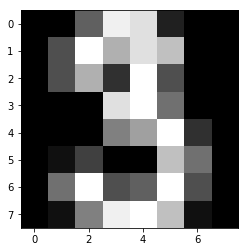

In [9]:
import random
x = random.randint(0,1796)
z=X[x].reshape(1,64)
plt.imshow(z.reshape(8,8),cmap='gray')
clf.predict(z)

In [10]:

x

431

In [18]:
clf2 = DecisionTreeClassifier()
x1 = digits.data
y2 = digits.target
clf2.fit(x1,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
clf2.predict([X[34]])

array([6])

In [22]:
from sklearn.tree import export_graphviz
print(export_graphviz(clf2,out_file=None))

digraph Tree {
node [shape=box] ;
0 [label="X[36] <= 0.5\ngini = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]"] ;
1 [label="X[28] <= 2.5\ngini = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[21] <= 0.5\ngini = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]"] ;
1 -> 2 ;
3 [label="X[53] <= 3.5\ngini = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 6, 0, 0, 0, 0]"] ;
3 -> 4 ;
5 [label="X[41] <= 5.5\ngini = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]"] ;
3 -> 5 ;
6 [label="X[10] <= 8.5\ngini = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]"] ;
6 -> 7 ;
8 [label="X[9] <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"] ;
6 -> 8 ;


In [23]:
export_graphviz(clf2, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tre.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tre.png'

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.14)

In [60]:
print(len(X_train),len(X_test))

1545 252


In [61]:
model =DecisionTreeClassifier()


In [62]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
from sklearn.metrics import accuracy_score


In [64]:
y_pred = model.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.8650793650793651